Raziskava Pokemonov:
klasifikacijsko napvovedovanje sposobnosti glede na vse ostale lastnosti.Regresija-Izvedli bomo regresijsko analizo, da razvijemo model za napovedovanje hp Pokemonov na podlagi ostalih značilnosti. Ta model nam bo omogočil pridobivanje vpogleda v to, kako se moč razlikuje glede na druge lastnosti.

Opis podatkov: Tip in tip2-vrsta pokemona, sposobnost-pokemonova sposobnost, HP- življenske točke pokemona

In [ ]:
import pandas as pd

df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/pokemon_podatki.csv", index_col="Ime", sep=",")
df

,Teza,Visina,Tip,Skupna osnovna statistika,Tip2,Sposobnost,HP,Napad,Obramba,Hitrost,PosebniNapad,PosebnaObramba
Ime,,,,,,,,,,,,
bulbasaur,69,7,grass,64,poison,overgrow,45,49,49,45,65,65
ivysaur,130,10,grass,142,poison,overgrow,60,62,63,60,80,80
venusaur,1000,20,grass,263,poison,overgrow,80,82,83,80,100,100
charmander,85,6,fire,62,NaN,blaze,39,52,43,65,60,50
charmeleon,190,11,fire,142,NaN,blaze,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...
galvantula,143,8,bug,165,electric,compound-eyes,70,77,60,108,97,60
ferroseed,188,6,grass,61,steel,iron-barbs,44,50,91,10,24,86
ferrothorn,1100,10,grass,171,steel,iron-barbs,74,94,131,20,54,116


#Vizualizacija

In [ ]:
df.describe()

,Teza,Visina,Skupna osnovna statistika,HP,Napad,Obramba,Hitrost,PosebniNapad,PosebnaObramba
count,600.000000,600.000000,600.000000,600.0000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,551.410000,11.356667,143.995000,67.9200,74.050000,69.995000,65.180000,67.341667,68.203333
std,894.932136,10.564823,79.983231,26.6874,28.948475,29.500657,27.347469,28.110234,26.705504
min,1.000000,1.000000,36.000000,1.0000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,99.000000,6.000000,65.000000,50.0000,52.000000,50.000000,45.000000,45.000000,50.000000
50%,280.000000,10.000000,147.000000,65.0000,73.000000,65.000000,65.000000,65.000000,65.000000
75%,600.000000,14.000000,175.000000,80.0000,94.000000,85.000000,85.000000,86.000000,85.000000
max,9500.000000,145.000000,635.000000,255.0000,165.000000,230.000000,160.000000,154.000000,230.000000


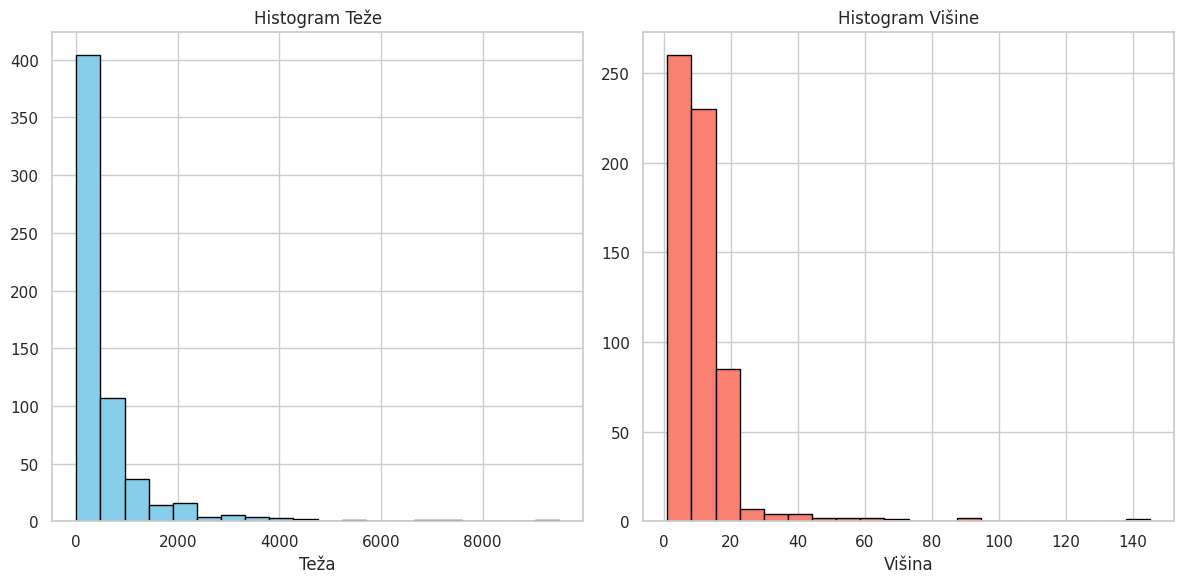

In [ ]:
import matplotlib.pyplot as plt

# Histogram Teže
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Teza'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Teže')
plt.xlabel('Teža')

# Histogram Višine
plt.subplot(1, 2, 2)
plt.hist(df['Visina'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram Višine')
plt.xlabel('Višina')

plt.tight_layout()
plt.show()


##Porazdelitev glede na tip

<ipython-input-146-b221f0c25df2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tip', data=df, palette='viridis')


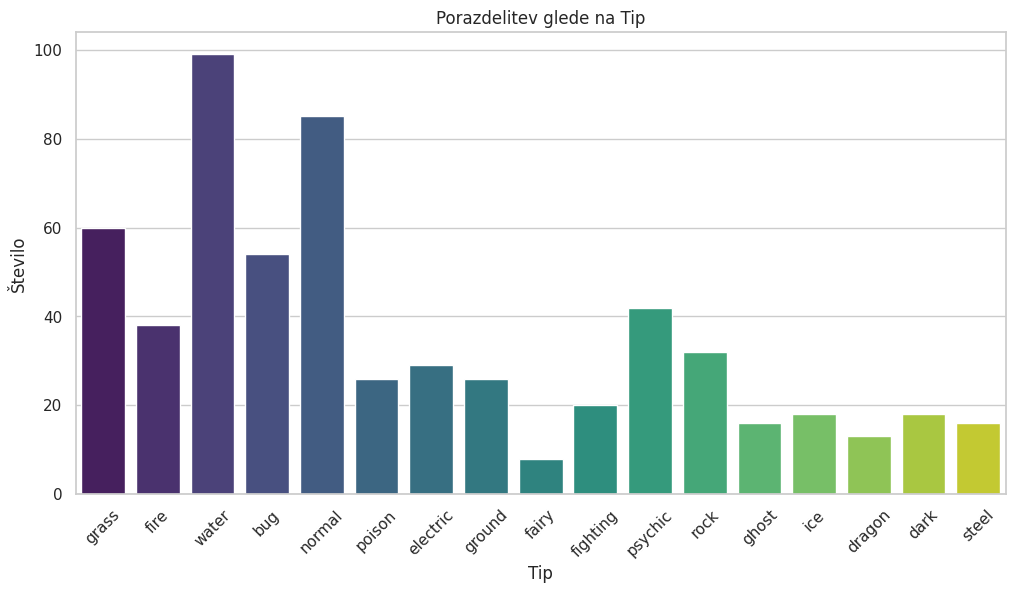

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Tip', data=df, palette='viridis')
plt.title('Porazdelitev glede na Tip')
plt.xlabel('Tip')
plt.ylabel('Število')
plt.xticks(rotation=45)
plt.show()


Opis: Iz grafa lahko npr. opazimo, da ima največ pokemonov sposobnost hitrega plavanja-swift swim

<ipython-input-147-e0637fbc6056>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sposobnost', data=df, palette='muted', order=df['Sposobnost'].value_counts().index)


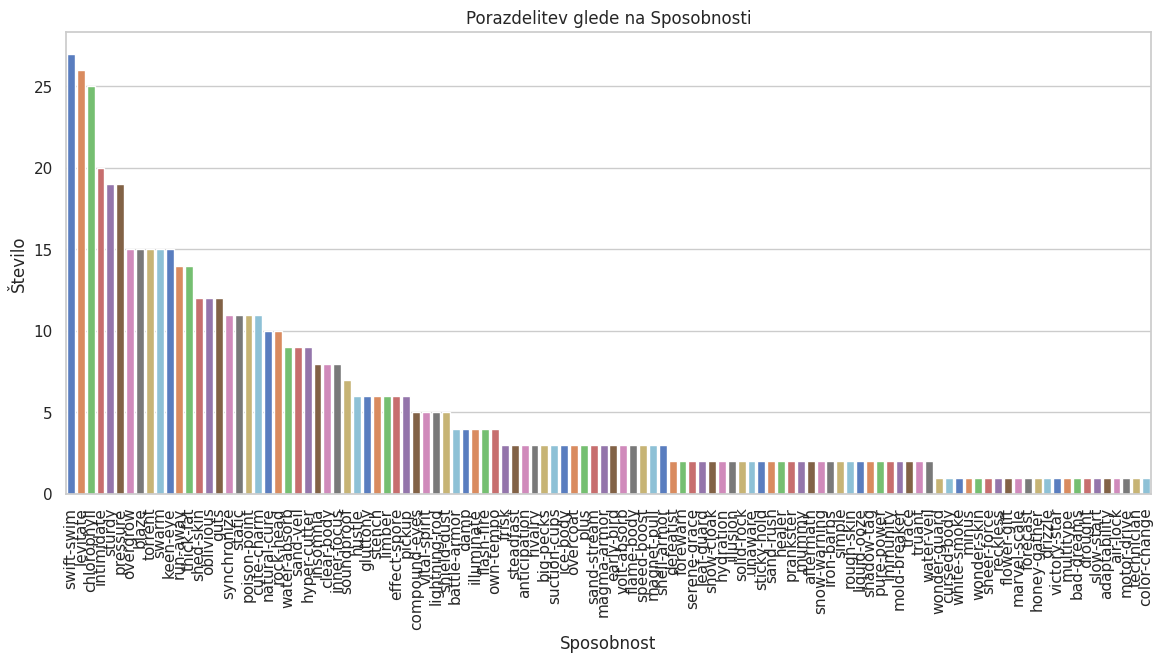

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Sposobnost', data=df, palette='muted', order=df['Sposobnost'].value_counts().index)
plt.title('Porazdelitev glede na Sposobnosti')
plt.xlabel('Sposobnost')
plt.ylabel('Število')
plt.xticks(rotation=90)
plt.show()


Graf korelacije je še posebej uporaben pri prepoznavanju vzorcev v podatkih. Povezanost med spremenljivkami se lahko razlikuje od močne pozitivne korelacije (ko obe spremenljivki rasteta ali padeta skupaj) do močne negativne korelacije (ko ena spremenljivka raste, druga pa pada) ali do odsotnosti korelacije.Iz grafa lahko izberemo višjo koleracija med težo in višino.

<ipython-input-148-22e0838c12e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


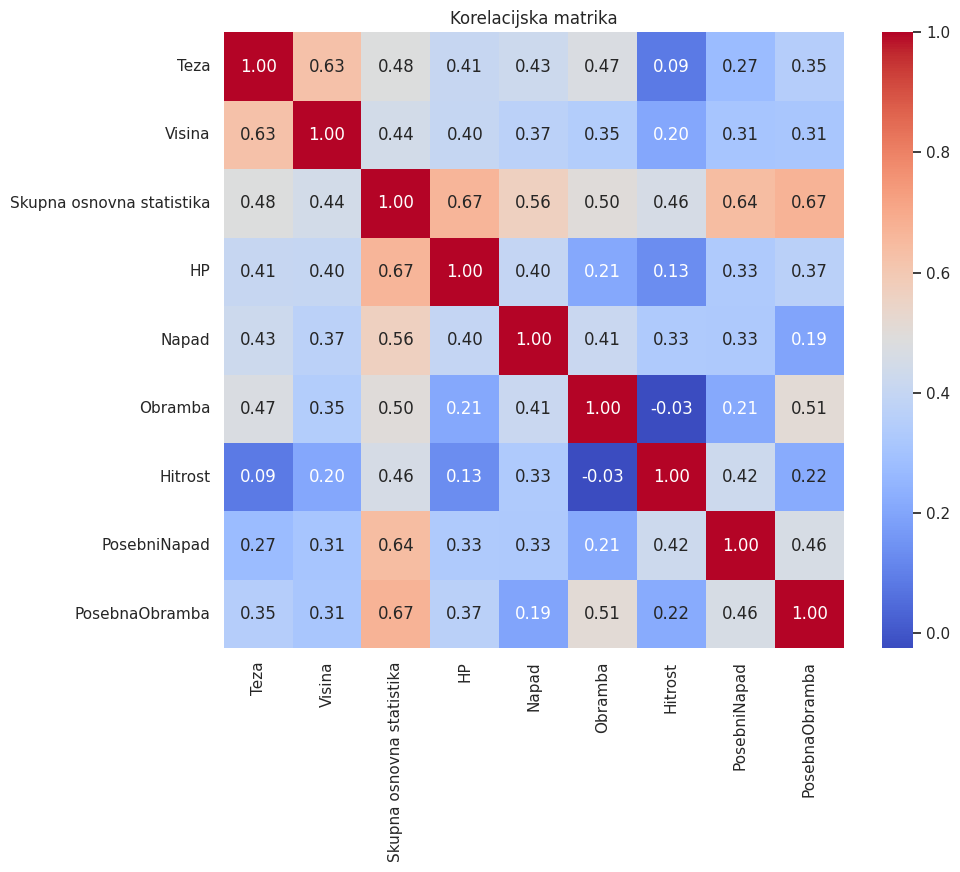

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelacijska matrika')
plt.show()

#1. PREDPROCESIRANJE IN OPTIMIZACIJA
čiščenje podatkov-odstranjevanje manjkajočih vrednosti, pretvorba kategoričnih podatkov v številske(ustvarjeni novi stolpci za tipe).

Ustvarili smo binarno kodiranje prisotnosti vrst za vsakega pokemona, kar bo omogočalo enostaven način analize prisotnosti posameznih vrst med podatki. To bo omogočilo, na primer, da se hitro preveri, kateri pokemoni so povezani z določeno vrsto ali kako pogosta je določena vrsta med podatki.

In [ ]:
import pandas as pd

#odstranitev manjkajocih vrednosti
df['Tip2'] = df['Tip2'].fillna('NaN')
#seznam vseh možnih vrstic v stolpcih 'Tip' in 'Tip2'
vse_vrste = set(df['Tip'].unique()) | set(df['Tip2'].unique())

# Ustvarite nove stolpce za vsako vrsto
for vrsta in vse_vrste:
    df[f'{vrsta}_Type'] = ((df['Tip'] == vrsta) | (df['Tip2'] == vrsta)).astype(int)
# Dodajanje stolpca 'fire_Type'
df['fire_Type'] = ((df['Tip'] == 'fire') | (df['Tip2'] == 'fire')).astype(int)

# Odstranitev stolpcev 'Tip' in 'Tip2', če nista več potrebna
df = df.drop(columns=['Tip', 'Tip2'])
df = df.drop(columns=['NaN_Type'])
df


,Teza,Visina,Skupna osnovna statistika,Sposobnost,HP,Napad,Obramba,Hitrost,PosebniNapad,PosebnaObramba,...,normal_Type,fairy_Type,electric_Type,poison_Type,ground_Type,psychic_Type,fighting_Type,steel_Type,dark_Type,fire_Type
Ime,,,,,,,,,,,,,,,,,,,,,
bulbasaur,69,7,64,overgrow,45,49,49,45,65,65,...,0,0,0,1,0,0,0,0,0,0
ivysaur,130,10,142,overgrow,60,62,63,60,80,80,...,0,0,0,1,0,0,0,0,0,0
venusaur,1000,20,263,overgrow,80,82,83,80,100,100,...,0,0,0,1,0,0,0,0,0,0
charmander,85,6,62,blaze,39,52,43,65,60,50,...,0,0,0,0,0,0,0,0,0,1
charmeleon,190,11,142,blaze,58,64,58,80,80,65,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
galvantula,143,8,165,compound-eyes,70,77,60,108,97,60,...,0,0,1,0,0,0,0,0,0,0
ferroseed,188,6,61,iron-barbs,44,50,91,10,24,86,...,0,0,0,0,0,0,0,1,0,0
ferrothorn,1100,10,171,iron-barbs,74,94,131,20,54,116,...,0,0,0,0,0,0,0,1,0,0


# 2. KLASIFIKACIJA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Predpostavljamo, da imate podatke shranjene v DataFrame z imenom df
# Če stolpec 'fire_Type' še ne obstaja, ga ustvarite
if 'fire_Type' not in df.columns:
    df['fire_Type'] = ((df['Tip'] == 'fire') | (df['Tip2'] == 'fire')).astype(int)

# Izberite lastnosti za model
features = [stolpec for stolpec in df.columns if stolpec != 'Sposobnost']

# Razdelite podatke na učno in testno množico
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Sposobnost'], test_size=0.2, random_state=42)

# Ustvarite in prilagodite model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Naredite napovedi na testni množici
predictions = model.predict(X_test)

# Evalvacija modela
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Izpišite rezultate
print(f'Natančnost modela: {accuracy}')


Natančnost modela: 0.30833333333333335


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Trenutna natančnost modela, ki znaša 0.3, se zdi relativno nizka, vendar je pomembno upoštevati število edinstvenih sposobnosti, ki so v podatkovnem naboru (110). Natančnost 0.3 v tem kontekstu kaže, da se model še vedno trudi obvladati to kompleksnost.

In [ ]:
unique_sposobnosti = df['Sposobnost'].unique()
stevilo_edinstvenih_sposobnosti = len(unique_sposobnosti)

print("Edinstvene sposobnosti:", unique_sposobnosti)
print("Število edinstvenih sposobnosti:", stevilo_edinstvenih_sposobnosti)

Edinstvene sposobnosti: ['overgrow' 'blaze' 'torrent' 'shield-dust' 'shed-skin' 'compound-eyes'
 'swarm' 'keen-eye' 'run-away' 'intimidate' 'static' 'sand-veil'
 'poison-point' 'cute-charm' 'flash-fire' 'inner-focus' 'chlorophyll'
 'effect-spore' 'pickup' 'limber' 'damp' 'vital-spirit' 'water-absorb'
 'synchronize' 'guts' 'clear-body' 'rock-head' 'oblivious' 'magnet-pull'
 'thick-fat' 'stench' 'shell-armor' 'levitate' 'cursed-body' 'insomnia'
 'hyper-cutter' 'soundproof' 'own-tempo' 'lightning-rod' 'natural-cure'
 'early-bird' 'swift-swim' 'illuminate' 'flame-body' 'volt-absorb' 'trace'
 'immunity' 'pressure' 'hustle' 'sturdy' 'speed-boost' 'shadow-tag'
 'serene-grace' 'magma-armor' 'suction-cups' 'sand-stream' 'truant'
 'wonder-guard' 'pure-power' 'plus' 'minus' 'liquid-ooze' 'rough-skin'
 'water-veil' 'white-smoke' 'battle-armor' 'marvel-scale' 'forecast'
 'color-change' 'drizzle' 'drought' 'air-lock' 'simple' 'rivalry'
 'mold-breaker' 'anticipation' 'honey-gather' 'flower-gift' 'sti

GRAF-prikaz razmarja med dejanskimi in napovedanimi razredi za vsako edinstveno sposobnost-kako se model obnese glede na edinstvene sposobnosti

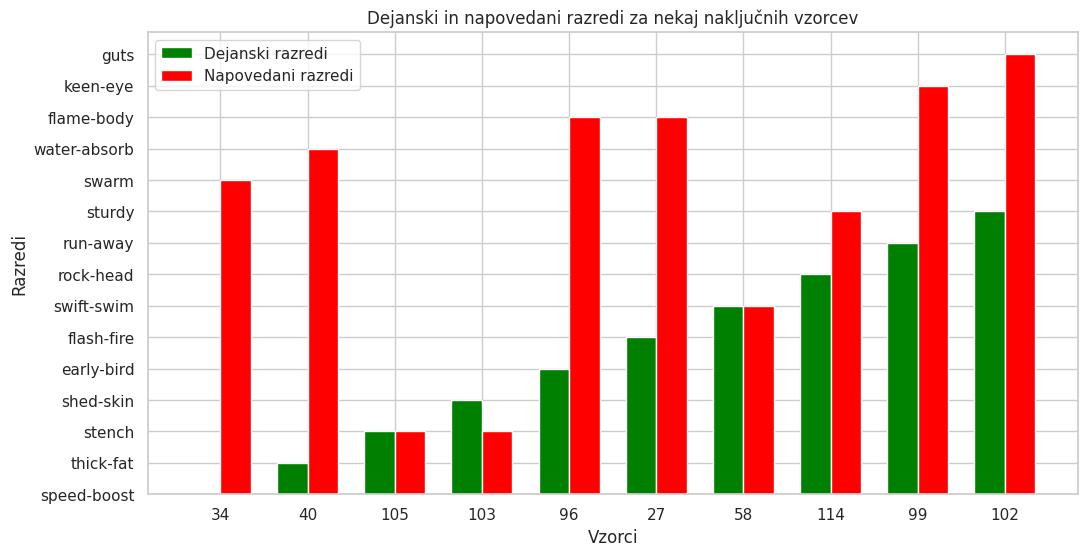

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Izberite nekaj naključnih vzorcev za prikaz
random_indices = np.random.choice(len(y_test), size=10, replace=False)

# Pripravite podatke za graf
dejanski_razredi = np.array(y_test)[random_indices]
napovedani_razredi = np.array(predictions)[random_indices]

# Ustvarite barvni graf
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(random_indices))

plt.bar(index, dejanski_razredi, color='green', width=bar_width, label='Dejanski razredi')
plt.bar(index + bar_width, napovedani_razredi, color='red', width=bar_width, label='Napovedani razredi')

plt.xlabel('Vzorci')
plt.ylabel('Razredi')
plt.title('Dejanski in napovedani razredi za nekaj naključnih vzorcev')
plt.xticks(index + bar_width / 2, random_indices)
plt.legend()

plt.show()

#REGRESIJA

In [ ]:
df=pd.get_dummies(df, columns=["Sposobnost"])
df

,Teza,Visina,Skupna osnovna statistika,HP,Napad,Obramba,Hitrost,PosebniNapad,PosebnaObramba,rock_Type,...,Sposobnost_truant,Sposobnost_unaware,Sposobnost_victory-star,Sposobnost_vital-spirit,Sposobnost_volt-absorb,Sposobnost_water-absorb,Sposobnost_water-veil,Sposobnost_white-smoke,Sposobnost_wonder-guard,Sposobnost_wonder-skin
Ime,,,,,,,,,,,,,,,,,,,,,
bulbasaur,69,7,64,45,49,49,45,65,65,0,...,0,0,0,0,0,0,0,0,0,0
ivysaur,130,10,142,60,62,63,60,80,80,0,...,0,0,0,0,0,0,0,0,0,0
venusaur,1000,20,263,80,82,83,80,100,100,0,...,0,0,0,0,0,0,0,0,0,0
charmander,85,6,62,39,52,43,65,60,50,0,...,0,0,0,0,0,0,0,0,0,0
charmeleon,190,11,142,58,64,58,80,80,65,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
galvantula,143,8,165,70,77,60,108,97,60,0,...,0,0,0,0,0,0,0,0,0,0
ferroseed,188,6,61,44,50,91,10,24,86,0,...,0,0,0,0,0,0,0,0,0,0
ferrothorn,1100,10,171,74,94,131,20,54,116,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
# Select relevant features
selected_features = features = [stolpec for stolpec in df.columns if stolpec != 'HP']

# Extract features and target variable
X = df[selected_features]
y = df['HP']

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this based on your preference

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a cross-validation object (e.g., using KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert scores to positive values and calculate mean
mae_cv = -cv_scores.mean()

# Print the cross-validated mean squared error
print(f'Cross-validated Mean absolute Error (Random Forest): {mae_cv}')

# Optionally, you can print individual fold scores as well
print(f'Cross-validated Scores for each fold: {cv_scores}')


Cross-validated Mean absolute Error (Random Forest): 12.287749999999999
Cross-validated Scores for each fold: [-12.79741667 -10.98233333 -12.7145     -11.60916667 -13.33533333]


Povprečna vrednost MAE je dokaj nizka, kar kaže na majhno povprečno absolutno odstopanje med napovedanimi in dejanskimi vrednostmi. To je spodbudno, saj manjše vrednosti MAE nakazujejo na boljšo sposobnost modela, da natančno napoveduje.

Glede na te rezultate bi lahko sklepali, da je Random Forest Regressor primeren model za naše podatke

GRUČENJE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

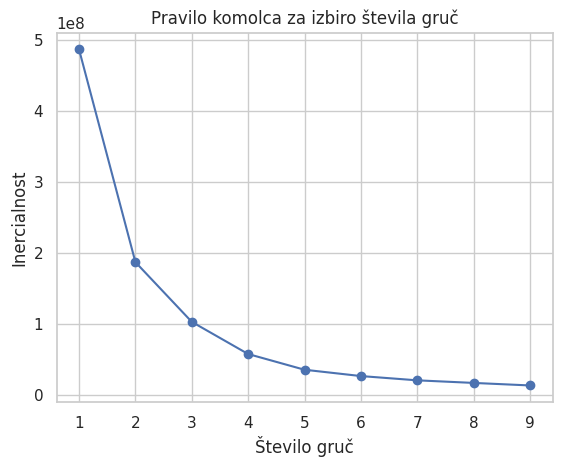

In [ ]:
inercialnost = []

# Preizkusimo različno število gruč
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inercialnost.append(kmeans.inertia_)

# Izris grafa pravila komolca
plt.plot(range(1, 10), inercialnost, marker='o')
plt.title('Pravilo komolca za izbiro števila gruč')
plt.xlabel('Število gruč')
plt.ylabel('Inercialnost')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features_for_clustering = df.columns

num_clusters = 2

X = df[features_for_clustering]

# Standardizacija značilk
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans algoritem za gručenje
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#središča gruč
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features_for_clustering)
print("Središča gruč:")
cluster_centers




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Središča gruč:


,Teza,Visina,Skupna osnovna statistika,HP,Napad,Obramba,Hitrost,PosebniNapad,PosebnaObramba,rock_Type,...,Sposobnost_truant,Sposobnost_unaware,Sposobnost_victory-star,Sposobnost_vital-spirit,Sposobnost_volt-absorb,Sposobnost_water-absorb,Sposobnost_water-veil,Sposobnost_white-smoke,Sposobnost_wonder-guard,Sposobnost_wonder-skin
0,974.746377,16.597826,209.992754,84.235507,92.380435,87.746377,74.865942,83.449275,84.942029,0.105072,...,0.003623,-7.806256e-18,3.623188e-03,-1.908196e-17,0.007246,0.021739,0.003623,3.623188e-03,1.734723e-18,3.623188e-03
1,190.790123,6.891975,87.774691,54.021605,58.435185,54.873457,56.929012,53.620370,53.944444,0.052469,...,0.003086,6.172840e-03,1.951564e-18,1.543210e-02,0.003086,0.009259,0.003086,4.770490e-18,3.086420e-03,9.540979e-18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


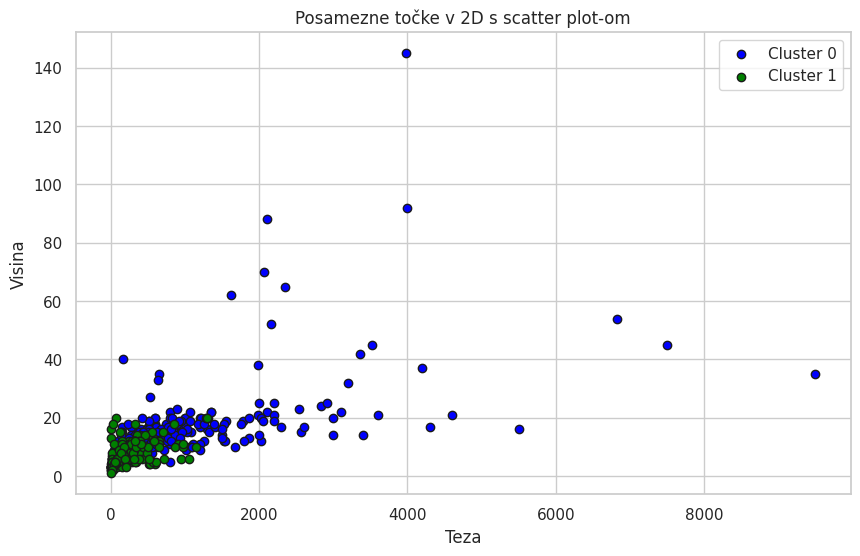

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Predpostavka: df je vaš podatkovni okvir

features_for_clustering = df.columns
num_clusters = 2

X = df[features_for_clustering]

# Standardizacija značilk
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans algoritem za gručenje
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot posameznih točk v 2D
plt.figure(figsize=(10, 6))

for cluster_label, color in zip(range(num_clusters), ['blue', 'green']):
    cluster_points = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_points['Teza'], cluster_points['Visina'], c=color, label=f'Cluster {cluster_label}', edgecolors='k')

plt.xlabel('Teza')
plt.ylabel('Visina')
plt.title('Posamezne točke v 2D s scatter plot-om')
plt.legend()
plt.show()


Sklepne Ugotovitve:
Kljub trenutni nizki natančnosti klasifikacije so rezultati še vedno uporabni. Analiza gručenja ponuja vpogled v naravo raznolikosti med Pokemoni. Pri nadaljnjem razvoju modela bi bilo smiselno raziskati dodatne značilke, ki bi lahko povečale natančnost. Skupaj z analizo gručenja to omogoča poglobljeno razumevanje značilnosti Pokemonov in njihove medsebojne povezanosti.